In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('../dataset/unified_dataset.csv')
print(f"Dataset Loaded: {df.shape}")
df.head()

Dataset Loaded: (81964, 3)


,text,label,language
0,‘मोदी के शासन के दौरान गंगा’ गंगा नदी नरेन्द्...,1,hi
1,यह खबर आने से पहले छवि क्रेडिट जस्टिन सुलिवान/...,1,hi
2,गुलाब गेंद वाल डे-नाइट टेस्ट मैच कप्ता विराट क...,0,hi
3,उत्तर कोरिया रॉकेट प्रक्षेपण योजनाएं 71 0 15 0...,1,hi
4,राष्ट्रपति डोनाल्ड ट्रम्प और प्रथम महिला मेलान...,0,hi


In [3]:
# 1. Check for missing values
print("Initial Null Values:\n", df.isnull().sum())

# 2. Drop rows with missing text
df = df.dropna(subset=['text'])

# 3. Drop rows with missing labels
df = df.dropna(subset=['label'])

# 4. Remove rows where text is only whitespace
df = df[df['text'].str.strip().astype(bool)]

print(f"\nShape after handling missing data: {df.shape}")
print("Final Null Values Check:", df.isnull().sum().sum())

Initial Null Values:
 text        1
label       0
language    0
dtype: int64

Shape after handling missing data: (81963, 3)
Final Null Values Check: 0


label
0    51382
1    30581
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_28152\1376301606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


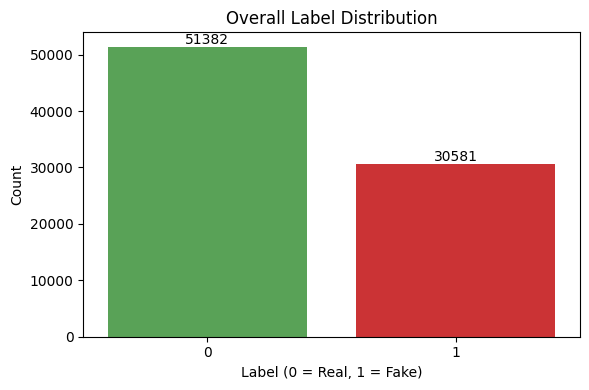

In [4]:
# Overall label distribution (0 = real, 1 = fake)
label_counts = df['label'].value_counts().sort_index()
print(label_counts)

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x=label_counts.index.astype(str),
    y=label_counts.values,
    palette=["#4daf4a", "#e41a1c"]
)

# add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom"
    )

plt.xlabel("Label (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.title("Overall Label Distribution")
plt.tight_layout()
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_28152\1255965326.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


language
hi    73837
en     8126
Name: count, dtype: int64


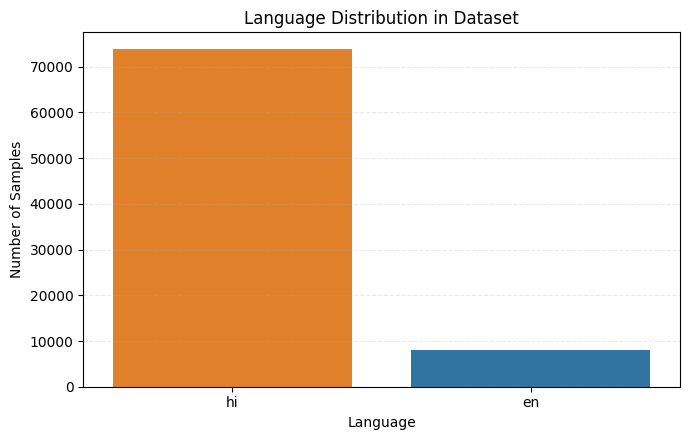

In [5]:
# Language distribution across the unified dataset
lang_counts = df['language'].value_counts()
print(lang_counts)

plt.figure(figsize=(7, 4.5))
sns.barplot(
    x=lang_counts.index,
    y=lang_counts.values,
    palette=["#ff7f0e", "#1f77b4", "#2ca02c"][:len(lang_counts)]
)
plt.xlabel("Language")
plt.ylabel("Number of Samples")
plt.title("Language Distribution in Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()

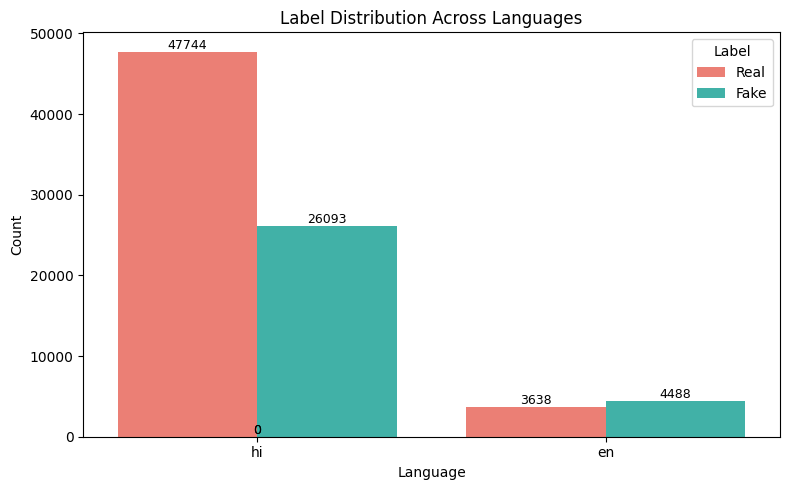

In [6]:
# Label distribution across languages
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x='language',
    hue='label',
    palette=['#ff6f61', '#2ec4b6']
)
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Label Distribution Across Languages")
plt.legend(title="Label", labels=["Real", "Fake"], loc='upper right')

# add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [7]:
# Text length analysis (word counts)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

df[['text_length']].describe()

,text_length
count,81963.000000
mean,37.912363
std,85.146270
min,1.000000
25%,11.000000
50%,13.000000
75%,18.000000
max,511.000000


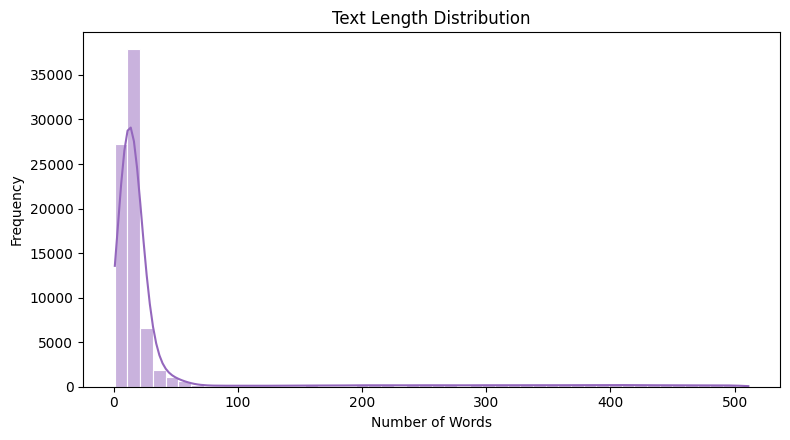

In [8]:
# Distribution of text lengths
plt.figure(figsize=(8, 4.5))
sns.histplot(df['text_length'], bins=50, kde=True, color='#9467bd', edgecolor='white')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Text Length Distribution")
plt.tight_layout()
plt.show()